The following data is given for dose/response of a new drug.

| Dose|Response|
|---|---|
| 0|0.1|
| 1.3|0.5|
| 2.8|0.9|
| 5|2.6|
| 10.2|7.1|
| 16.5|12.3|
| 21.3|15.3|
| 31.8|20.4|
| 52.2|24.2|

A typical model for this data is

$F(x) = d + \frac{a - d}{1 + \left(\frac{x}{c}\right)^b}$

where

-   **a:** Minimum asymptote. In a bioassay where you have a standard curve, this can be thought of as the response value at 0 standard concentration.
-   **b:** Hill's slope. The Hill's slope refers to the steepness of the curve (can be positive or negative) at the inflection point.
-   **c:** Inflection point. The inflection point is defined as the point on the curve where the curvature changes direction or signs. $c$ is the dose where $y=(d-a)/2$.
-   **d:** Maximum asymptote. In a bioassay where you have a standard curve, this can be thought of as the response value for infinite standard concentration.

Use this data to find values for $a, b, c, d$ and the confidence interval for each parameter. Provide an interpretation of the confidence intervals.



Show your fit with the data in a plot.



The residual errors are defined as the difference between the model and the data. Make a plot of the residual errors and discuss whether there are any patterns in the residuals.



### solution



We use nlinfit for this. There isn't anything real tricky, we have to guess the parameters based on the data and meaning of them above.

In [5]:
import numpy as np

dose = np.array([0, 1.3, 2.8, 5, 10.2, 16.5, 21.3, 31.8, 52.2])
response = np.array([0.1, 0.5, 0.9, 2.6, 7.1, 12.3, 15.3, 20.4, 24.2])

def model(x, *pars):
    a, b, c, d = pars
    return d + (a - d) / (1 + (x / c)**b)

from pycse import nlinfit

#         a   b  c   d
guess = (0.1, 2, 16, 25)
p, pint, perr = nlinfit(model, dose, response, guess)
for par, interval in zip(['a', 'b', 'c', 'd'], pint):
    print(f'{par}: {interval}')

a: [-0.16192382  0.46907915]
b: [1.6140743  1.92944114]
c: [18.03650497 20.66229562]
d: [27.01307699 29.88276816]


For these, the interval of a includes zero, so it is possible that we do not need to define this parameter because its value is really just 0. The rest of them simply indicate there is some uncertainty of the true value of the parameters but they are probably not zero.

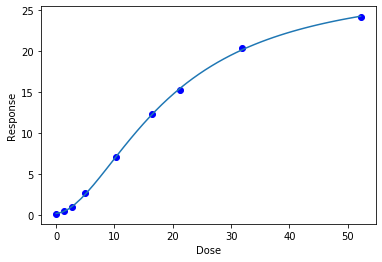

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dose, response, 'bo')

fitd = np.linspace(0, dose.max())
plt.plot(fitd, model(fitd, *p))
plt.xlabel('Dose')
plt.ylabel('Response');

The fit looks reasonable.

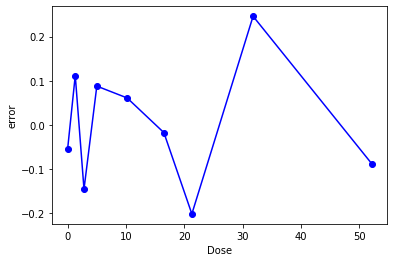

In [13]:
plt.plot(dose, response - model(dose, *p), 'bo-')
plt.xlabel('Dose')
plt.ylabel('error');

It is not obvious there are any trends there. There are roughly equal numbers of points above and below zero, and the they roughly alternate. This seems like a pretty good distribution of errors.